# Single Variable Gradient Descent

In [6]:
import numpy as np

In [17]:
#calculate cost funtions
def cost(x,y,m,b):
    return ((y-m*x-b)**2).mean()

In [18]:
#calculate gradients and updte m and b values
def step_gradient(x,y,learning_rate ,m,b):
    k=x.shape[0]
    n=m.shape
    slope_m=0
    slope_b=0
    for i in range(k):
        #for j in range(n): # for n varibles i.e n features
        slope_m+=(2/k)*x[i]*(m*x[i] + b -y[i])
        slope_b+=(2/k)*(m*x[i] + b -y[i])
    new_m= m - learning_rate*slope_m
    new_b= b - learning_rate*slope_b
    return new_m,new_b
    

In [36]:
#running multiple iterations of step gradient
def gradient_descent(x,y,learning_rate=0.1, num_iter = 100 , init_m=0 , init_b=0):
    m=init_m
    b=init_b
    print("Start : ", cost(x,y,m,b))
    for i in range(num_iter):
        m,b = step_gradient(x,y,learning_rate ,m,b)
        print(i," : ", cost(x,y,m,b)," m= ",m,"b= ",b)
    return (m,b)

In [61]:
#data loading and calling gradient discent
def run(x,y):
    learning_rate=0.01
    num_iter=10
    m,b=gradient_descent(x,y, learning_rate, num_iter)
    print(m, b)
    return m,b
    

In [38]:
from sklearn import datasets
import pandas as pd

In [54]:
from sklearn.linear_model import LinearRegression

In [39]:
boston=datasets.load_boston()

In [40]:
y=boston.target

In [41]:
x=boston.data[:,0]

In [42]:
x.shape , y.shape

((506,), (506,))

In [62]:
m,b=run(x,y)

Start :  592.1469169960474
0  :  561.7031995007927  m=  1.0106365086561266 b=  0.4506561264822139
1  :  538.1945004209987  m=  0.23696928709295206 b=  0.8196594148672234
2  :  518.6831191131948  m=  0.7779123579142079 b=  1.2368901347765338
3  :  501.5676788272929  m=  0.35115580429938437 b=  1.6068958411865524
4  :  485.97190459069895  m=  0.6375766602995481 b=  2.0001746521831723
5  :  471.41308176458165  m=  0.39922723673808497 b=  2.365001326575123
6  :  457.622216241623  m=  0.5478284911166764 b=  2.739662883359133
7  :  444.4464792859574  m=  0.4119043648157662 b=  3.096150462014266
8  :  431.79628459427073  m=  0.48597863883976866 b=  3.4552778647930986
9  :  419.6165745532256  m=  0.4058346808065877 b=  3.8018986152020027
0.4058346808065877 3.8018986152020027


In [55]:
clf=LinearRegression()

In [57]:
clf.fit(x.reshape(506,1),y.reshape(506,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
t=clf.predict(y.reshape(506,1))

In [63]:
a=y*m+b

In [73]:
import math

In [80]:
((t-a)**2).mean()

31.41619782256943

In [83]:
(t-a).max() , (t-a).min()

(16.121274327952296, -20.71614705535087)

In [86]:
import matplotlib.pyplot as plt


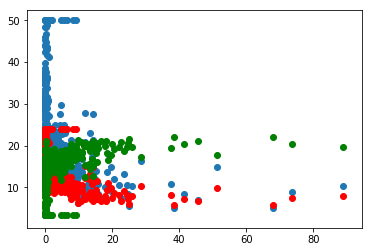

In [96]:
plt.scatter(x,y)
plt.scatter(x,a,color='r')
plt.scatter(x,t,color='g')

# Multiple Variable Gradient descent

In [222]:
#running multiple iterations of step gradient
def gradient_descent(x,y,learning_rate=0.1, num_iter = 100 , init_m=0 , init_b=0):
    m=np.zeros(x.shape[1])
    b=np.zeros(x.shape[1])
    print("Start : ", cost(x,y,m,b))
    for i in range(num_iter):
        m,b = step_gradient(x,y,learning_rate ,m,b)
        print(i," : ", cost(x,y,m,b)," m= ",m[0],"b= ",b[0])
    return (m,b)

In [262]:
#calculate gradients and updte m and b values
def step_gradient(x,y,learning_rate ,m,b):
    k=x.shape[0]
    n=m.shape[0]
    slope_m=np.zeros(x.shape[1])
    slope_b=np.zeros(x.shape[1])
    new_m=np.zeros(x.shape[1])
    new_b=np.zeros(x.shape[1])
    for i in range(k):
        for j in range(n): # for n varibles i.e n features
            slope_m[j]+=(2/k)*x[i][j]*(m[j]*x[i][j] + b[j] -y[i])
            slope_b[j]+=(2/k)*(m[j]*x[i][j] + b[j] - y[i])
    for i in range(n):
        new_m[i]= m[i] - learning_rate*slope_m[i]
        new_b[i]= b[i] - learning_rate*slope_b[i]
    return new_m,new_b
    

In [263]:
#calculate cost funtions
def cost(x,y,m,b):
    
    costar=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        midsum=0
        for j in range(x.shape[1]):
            midsum+=(m[j]*x[i]+b[j])   # debug this statememt 
        costar[i]=((y[i]-midsum)**2).mean()
            
    return costar

In [264]:
#data loading and calling gradient discent
def run(x,y):
    learning_rate=0.00001
    num_iter=10
    m,b=gradient_descent(x,y, learning_rate, num_iter)
    print(m, b)
    return m,b
    

In [265]:
x=boston.data

In [266]:
x.shape

(506, 13)

In [267]:
y=boston.target

In [268]:
m,b=run(x,y.reshape(506,1))

Start :  [ 576.    466.56 1204.09 1115.56 1310.44  823.69  524.41  734.41  272.25
  357.21  225.    357.21  470.89  416.16  331.24  396.01  533.61  306.25
  408.04  331.24  184.96  384.16  231.04  210.25  243.36  193.21  275.56
  219.04  338.56  441.    161.29  210.25  174.24  171.61  182.25  357.21
  400.    441.    610.09  948.64 1218.01  707.56  640.09  610.09  449.44
  372.49  400.    275.56  207.36  376.36  388.09  420.25  625.    547.56
  357.21 1253.16  610.09  998.56  542.89  384.16  349.69  256.    492.84
  625.   1089.    552.25  376.36  484.    302.76  436.81  585.64  470.89
  519.84  547.56  580.81  457.96  400.    432.64  449.44  412.09  784.
  571.21  615.04  524.41  571.21  707.56  506.25  492.84  556.96  823.69
  510.76  484.    524.41  625.    424.36  806.56  457.96 1497.69 1918.44
 1102.24  756.25  702.25  345.96  372.49  404.01  380.25  380.25  416.16
  392.04  376.36  470.89  519.84  353.44  349.69  342.25  334.89  449.44
  368.64  416.16  372.49  484.    412.09  42

IndexError: index 13 is out of bounds for axis 0 with size 13

In [273]:
def predict(x,m,b):
    temp=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        midsum=0
        for j in range(x.shape[1]):
            midsum+=((m[j]*x[:,j])+b[j])
        temp[i]=midsum
        
    return temp
    

In [274]:
t=predict(x,m,b)

ValueError: setting an array element with a sequence.

In [275]:
m,b

(array([ 1.00264422e-02,  6.27495446e-02,  4.34195349e-02,  3.93408233e-04,
         2.40857022e-03,  2.91115287e-02,  1.81233751e-01,  1.80366022e-02,
         3.63812493e-02, -1.82900477e+03,  7.86696488e-02, -1.31104462e+01,
         4.64572735e-02]),
 array([ 4.50290243e-03,  4.44039016e-03,  4.46236304e-03,  4.50615325e-03,
         4.50603545e-03,  4.48966586e-03,  3.15426782e-03,  4.49999109e-03,
         4.47469667e-03, -3.82798770e+00,  4.37382777e-03, -3.43720594e-02,
         4.45284163e-03]))

In [276]:
t

array([-3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -3.80173674e+08, -3.80173674e+08, -3.80173674e+08,
       -3.80173674e+08, -